In [55]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ENVY\.cache\kagglehub\datasets\mathchi\churn-for-bank-customers\versions\1


In [56]:
import pandas as pd

churn = pd.read_csv(f"{path}/churn.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [58]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [59]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
churn.duplicated().sum()

np.int64(0)

In [61]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1, inplace=True)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
churn['Geography'] = churn['Geography'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')

In [64]:
churn['HasCrCard'] = churn['HasCrCard'].astype('int')
churn['IsActiveMember'] = churn['IsActiveMember'].astype('int')
churn['Exited'] = churn['Exited'].astype('int')

In [65]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


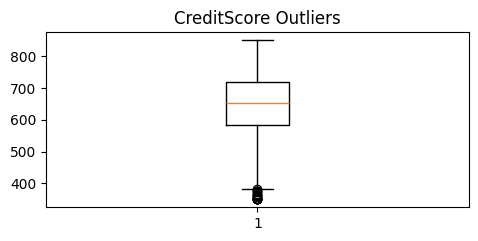

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(2,2,2)
plt.boxplot(churn['CreditScore'])
plt.title('CreditScore Outliers')



plt.show()


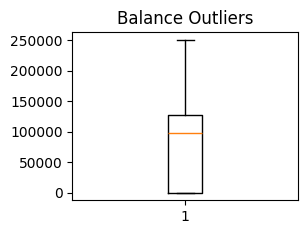

In [81]:
plt.subplot(2,2,2)
plt.boxplot(churn['Balance'])
plt.title('Balance Outliers')

plt.show()

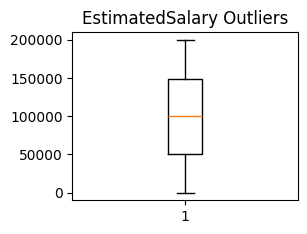

In [83]:
plt.subplot(2,2,2)
plt.boxplot(churn['EstimatedSalary'])
plt.title('EstimatedSalary Outliers')

plt.show()

In [85]:
# Function to detect outliers using IQR
def detect_outliers_iqr(churn, column):
    Q1 = churn[column].quantile(0.25)
    Q3 = churn[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = churn[(churn[column] < lower) | (churn[column] > upper)]
    return outliers, lower, upper

# Detect outliers
credit_outliers, credit_lower, credit_upper = detect_outliers_iqr(churn, 'CreditScore')
balance_outliers, balance_lower, balance_upper = detect_outliers_iqr(churn, 'Balance')
estimated_outliers, estimated_lower, estimated_upper = detect_outliers_iqr(churn, 'EstimatedSalary')

print(f"CreditScore bounds: {credit_lower:.2f} - {credit_upper:.2f}")
print(f"Balance bounds: {balance_lower:.2f} - {balance_upper:.2f}")
print(f"EstimatedSalary bounds: {estimated_lower:.2f} - {estimated_upper:.2f}")
print(f"CreditScore outliers: {len(credit_outliers)}")
print(f"Balance outliers: {len(balance_outliers)}")
print(f"EstimatedSalary outliers: {len(estimated_outliers)}")


CreditScore bounds: 383.00 - 919.00
Balance bounds: -191466.36 - 319110.60
EstimatedSalary bounds: -96577.10 - 296967.45
CreditScore outliers: 15
Balance outliers: 0
EstimatedSalary outliers: 0


In [87]:
churn = churn[(churn['CreditScore'] >= credit_lower) & (churn['CreditScore'] <= credit_upper)]
churn['CreditScore'].describe()

count    9985.000000
mean      650.963245
std        96.072231
min       383.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64